# Probabilidades
</br>
$$P_{\text{empírica}}(A) = \frac{\text{Número de ocurrencias de A}}{N}$$

Donde:


*   N = Total de la muestra 
*   A = Es el evento que queremos medir

</br>

**A medida que N → infinito, la probabilidad empírica tiende a la probabilidad (teórica) del evento** 

$$P(A) = \lim_{n\to\infty} \frac{\text{Número de ocurrencias de A}}{N}$$





# Generación de Números Aleatorios con numpy



In [ ]:
#pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#IMPORTAMOS LAS LIBRERIAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
N = 10 #Los numeros van a estar entre 0 y N
for i in range(5):#Cantidad de numeros que quieroo generar
    x = np.random.randint(N)
    print(x)#.randint te da numeros con iguales probabilidades


0
9
8
4
0


# Simulación de Monte Carlo
¿Cual es la probabilidad de que la suma de 2 dados sea igual a 7?
</br>
</br>
Hay 6 maneras de que la suma de 7:

*   (1, 6)
*   (2, 5)
*   (3, 4)
*   (4, 3)
*   (5, 2)
*   (6, 1)
</br>







In [ ]:
COMBINACIONES =6*6
COMBINACIONES_VALIDAS= 6
Probabiliad= COMBINACIONES_VALIDAS/COMBINACIONES
print("La probabilidad empirica es:",Probabiliad )  

La probabilidad empirica es: 0.16666666666666666


SIMULACIÓNDEL PROBLEMA

In [ ]:
N= 1000000
countador= 0
for i in range (N):
  dado_1=np.random.randint(6)+1
  dado_2=np.random.randint(6)+1
  if int(dado_1+dado_2)==7:
    countador = countador+1
probabilidad_empirica = countador/N
print("La probabilidad empirica es:",probabilidad_empirica )  

La probabilidad empirica es: 0.166069


# BLACK AND SCHOLES

In [ ]:
#CARGAMOS LOS PARAMETROS

S = 50  # Precio inicial de la acción
K = 49.6  # Precio de ejercicio
T = 0.2  # Tiempo hasta el vencimiento
r = 0.05  # Tasa de interés libre de riesgo (anual)
q = 0.0  # Tasa de dividendo (anual)
sigma = 0.0956  # Volatilidad (anual)
steps = 50  # Pasos de tiempo
N = 100  # Número de simulaciones

#CALCULAMOS LAS TRAYECTORIAS DE LOS PRECIOS CON EL MODELO GEOMETRICO DE MOVIMIENTO BROWNIANO

def geo_paths(S, T, r, q, sigma, steps, N):
    dt = T / steps
    ST = np.log(S) + np.cumsum(((r - q - sigma**2/2) * dt +
                                sigma * np.sqrt(dt) *
                                np.random.normal(size=(steps, N))), axis=0)
    return np.exp(ST)

paths = geo_paths(S, T, r, q, sigma, steps, N)

df_Simulations = pd.DataFrame(paths)
df_Simulations.columns = ['Simulation {}'.format(i+1) for i in range(N)]

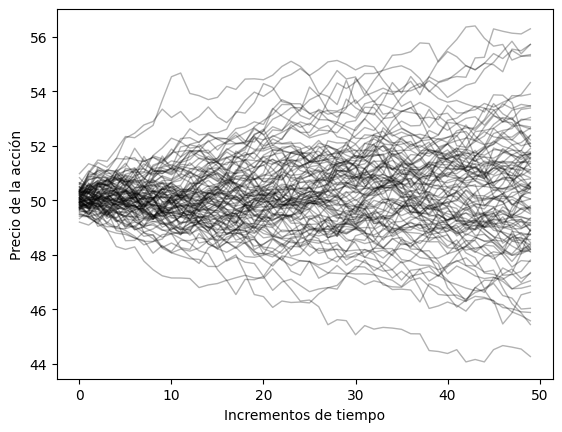

In [ ]:
#VISUALIZACIÓN DE LAS TRAYECTORIAS DEL PRECIO EN EL TIEMPO
plt.plot(paths, color='black', alpha=0.3, lw=1.0)
plt.xlabel("Incrementos de tiempo")
plt.ylabel("Precio de la acción")

# Imprimir el head del DataFrame
plt.show()

In [ ]:
#MOSTRAMOS LOS VALORES DEL PRECIO EN EL TIEMPO
print(df_Simulations.iloc[:, :2])


    Simulation 1  Simulation 2
0      50.490152     49.683698
1      50.406212     49.916086
2      50.279763     50.067388
3      50.615011     50.312651
4      50.831214     49.850902
5      50.683649     49.650264
6      50.757718     49.551409
7      50.922388     49.359899
8      51.171463     49.410758
9      51.209781     49.120919
10     51.311063     49.204157
11     51.166542     48.904972
12     51.056532     49.161293
13     50.852700     49.224657
14     51.097493     49.143513
15     51.358959     49.158101
16     51.309825     48.759762
17     51.649691     48.928312
18     51.379805     48.879016
19     51.203982     48.787533
20     51.589603     49.037939
21     51.405417     48.755675
22     51.252746     48.599425
23     51.740583     48.891090
24     51.660727     48.897982
25     51.438822     49.052482
26     51.629859     48.897792
27     51.812477     48.843734
28     51.487806     49.124275
29     51.896941     49.313822
30     51.604371     49.405122
31     5

In [ ]:
# FUNCIÓN PARA CALCULAR EL PRECIO DE UNA OPCIÓN DE COMPRA UTILIZANDO BLACK AND SCHOLES
def black_scholes_call(S, K, T, r, q, sigma):
    d1 = (np.log(S / K) + (r - q + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price


DONDE: 

\begin{align*}
    d_1 &= \frac{\log\left(\frac{S}{K}\right) + \left(r - q + \frac{\sigma^2}{2}\right)T}{\sigma\sqrt{T}} \\
    d_2 &= d_1 - \sigma\sqrt{T}
\end{align*}

</br>

\begin{equation*}
\text{Call Price} = S \cdot \Phi(d_1) - K \cdot e^{-rT} \cdot \Phi(d_2)
\end{equation*}





In [ ]:
# CALCULAR EL PRECIO DE LA OPCION DE COMPRA UTILIZANDO BLACK AND SCHOLES
bs_call_price = np.round(black_scholes_call(S, K, T, r, q, sigma),5)

print("Precio de la opción de compra (Black-Scholes):", bs_call_price)


Precio de la opción de compra (Black-Scholes): 1.36595


In [ ]:
# CALCULAR EL PRECIO DE LA OPCION DE COMPRA UTILIZANDO MONTE CARLO

precio_finales_de_las_simulaciones=paths[-1]
call_prices = np.maximum(precio_finales_de_las_simulaciones - K, 0) * np.exp(-r * T)

mc_call_price = np.round(np.mean(call_prices),5)

print("Precio de la opción de compra (Monte Carlo):", mc_call_price)

Precio de la opción de compra (Monte Carlo): 1.31682


DONDE:

\begin{equation*}
\text{call price} = \frac{1}{N} \sum_{i=1}^{N} \left( \max(S_T^i - K, 0) \right) \cdot e^{-rT}
\end{equation*}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import ipywidgets as widgets
from IPython.display import display

def black_scholes(S, K, r, sigma, T):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def monte_carlo(S, K, r, sigma, T, num_simulations):
    epsilon = np.random.randn(num_simulations)
    stock_prices = S * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * epsilon)
    call_price = np.exp(-r * T) * np.mean(np.maximum(0, stock_prices - K))
    return call_price

def plot_option_prices(S, K, r, sigma, T, num_simulations):
    stock_prices = np.linspace(0.8 * S, 1.2 * S, 100)
    call_prices_bs = black_scholes(stock_prices, K, r, sigma, T)
    
    call_prices_mc = []
    for stock_price in stock_prices:
        call_price = monte_carlo(stock_price, K, r, sigma, T, num_simulations)
        call_prices_mc.append(call_price)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(stock_prices, call_prices_bs, label='Black-Scholes', linestyle='--', linewidth=2, color='blue')
    ax.plot(stock_prices, call_prices_mc, label='Monte Carlo', linestyle='-', linewidth=2, color='green')
    ax.axvline(x=K, linestyle=':', color='gray', label='Precio de Ejercicio')
    ax.axvline(x=S, linestyle='--', color='purple', label='Precio de Acción')
    ax.set_xlabel('Precio de Acción')
    ax.set_ylabel('Precio de Opción')
    ax.set_title('Precios de Opción Call vs. Precio de Acción')
    ax.legend(loc='upper left')
    ax.grid(True)

    plt.tight_layout()
    plt.show()

# Parámetros iniciales
S = 50
K = 49.6
r = 0.05
sigma = 0.0956
T = 1  # Tiempo de vencimiento en años
num_simulations = 100

# Crear los sliders
stock_price_widget = widgets.FloatSlider(value=S, min=40, max=1000, step=0.1, description='P. Acción')
strike_price_widget = widgets.FloatSlider(value=K, min=40, max=1000, step=0.1, description='P. Ejercicio')
risk_free_rate_widget = widgets.FloatSlider(value=r, min=0, max=0.1, step=0.01, description='Tasa Libre de Riesgo')
volatility_widget = widgets.FloatSlider(value=sigma, min=0, max=1, step=0.01, description='Volatilidad')
time_to_maturity_widget = widgets.FloatSlider(value=T, min=1/12, max=10, step=1/12, description='T. Vencimiento (años)')
num_simulations_widget = widgets.IntSlider(value=num_simulations, min=10, max=10000, step=10, description='Simulaciones')

# Función de interacción
def interactive_plot(stock_price, strike_price, risk_free_rate, volatility, time_to_maturity, num_simulations):
    plot_option_prices(stock_price, strike_price, risk_free_rate, volatility, time_to_maturity, num_simulations)

# Crear la interfaz interactiva
widget_ui = widgets.interactive_output(interactive_plot, {
    'stock_price': stock_price_widget,
    'strike_price': strike_price_widget,
    'risk_free_rate': risk_free_rate_widget,
    'volatility': volatility_widget,
    'time_to_maturity': time_to_maturity_widget,
    'num_simulations': num_simulations_widget
})

# Estilo de los sliders
style = {'description_width': '150px'}
stock_price_widget.style = style
strike_price_widget.style = style
risk_free_rate_widget.style = style
volatility_widget.style = style
time_to_maturity_widget.style = style
num_simulations_widget.style = style

# Mostrar la interfaz
display(widgets.VBox([
    stock_price_widget,
    strike_price_widget,
    risk_free_rate_widget,
    volatility_widget,
    time_to_maturity_widget,
    num_simulations_widget
]), widget_ui)


Output()